In [11]:
import matplotlib.pyplot as plt
import numpy as np
from snaptools import snapio
from snaptools import plot_tools
from snaptools import utils
from functools import partial
from snaptools import manipulate
from snaptools import CBcm
from matplotlib.patches import Ellipse

import conversions as co
import matplotlib.patheffects as PathEffects
import h5py
from mpl_toolkits.axes_grid1 import Grid

colors = ['#332288', '#CC6677', '#6699CC', '#117733']

%matplotlib inline

In [29]:
def custom_plot(snap, axis, settings, plot_contours=True):
    bin_dict = snap.bin_snap(settings)
    Z2 = bin_dict['Z2']
    centerx = (bin_dict['Z2x'][:-1] + bin_dict['Z2x'][1:]) / 2
    centery = (bin_dict['Z2y'][:-1] + bin_dict['Z2y'][1:]) / 2
    centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')
    
    xmax = 8
    ymax = 8
    
    im_func = settings['im_func']
    levels = np.linspace(settings['in_min'], settings['in_max'], 20)
    levels = np.append(levels, 2.8)

    im = axis.contourf(centerX, centerY, Z2,
                       colors = [(198/255.,219/255.,239/255., 1),
                                 (158/255.,202/255.,225/255., 1),
                                 cmap(0), cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.8), cmap(1)],
                       vmin=settings['in_min'],
                      levels=levels[[0, 4, 8, 12, 16, -2, -1]])
    if settings['plotCompanionCOM']:
        companionCOM = bin_dict['companionCOM']
        if (np.abs(companionCOM[0]) < xmax
                and np.abs(companionCOM[1]) < ymax):
            axis.plot(companionCOM[0], companionCOM[1], marker='o', ms=10)
            com1, com2, gal1id, gal2id = snap.center_of_mass('stars')

            vx = snap.vel['stars'][gal2id, 0].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))
            vy = snap.vel['stars'][gal1id, 1].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))

            axis.arrow(companionCOM[0], companionCOM[1],
                       vx, vy,
                       head_width=0.25, head_length=0.5, fc='k', ec='k')

    if plot_contours:
        measurements = manipulate.fit_contours(Z2, settings, plot=True)
        eccs = measurements['eccs']
        majors = measurements['majors']
        minors = measurements['minors']
        axes_ratios = measurements['axes_ratios']
        xCenters = measurements['xCenters']
        yCenters = measurements['yCenters']
        ellipses = measurements['ellipses']
        angles = measurements['angles']

        bar_ind = np.max(np.where(eccs > 0.5)[0])
        for i, (e,
                major,
                minor,
                ecc,
                axis_ratio,
                xCenter,
                yCenter,
                angle) in enumerate(zip(ellipses,
                                        majors,
                                        minors,
                                        eccs,
                                        axes_ratios,
                                        xCenters,
                                        yCenters,
                                        angles)):
            e = Ellipse([xCenter, yCenter],
                         major,
                         minor,
                         angle=-angle,
                         fill=False)
            if i == bar_ind:
                e.set_color('#ffffbf')
                print "Bar center: %g, %g" % (yCenter, xCenter)
                axis.add_artist(e)
            elif i == 0:
                e.set_color('black')
                print "Disk center: %g, %g" % (yCenter, xCenter)
                #axis.plot(yCenter, xCenter, 'r+', ms=5, zorder=10)
                axis.add_artist(e)

            elif i in [4, 8, 12, 16, 20]:
                e.set_color('#fc8d59')
                axis.add_artist(e)
            #if (i==0) or ((major != majors[i-1]) and (minor != minors[i-1])):
            #    ell_art = axis.add_artist(e)
            
    if plot_contours:
        return im, measurements
    else:
        return im


In [25]:
folder = '/usr/users/spardy/coors2/working/Dehnen_LMC/collisions_best/output_Dehnen_smc_45deg/'
snapnum = 10
snap = snapio.load_snap('{:s}snap_{:03d}'.format(folder, snapnum))

Disk center: -0.712793, 0.758052
Bar center: 0.375379, -0.439396


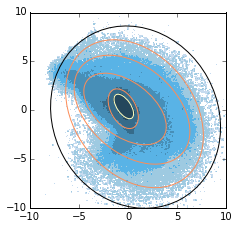

In [30]:
fig, axis = plt.subplots(1, figsize=(3.5, 3.5))
settings = utils.make_settings()
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 

im = custom_plot(snap, axis, settings, plot_contours=True)

Disk center: -0.234097, 0.484393
Bar center: 0.0852582, -0.121943


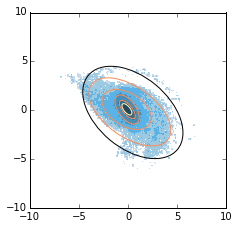

In [31]:
fig, axis = plt.subplots(1, figsize=(3.5, 3.5))
settings = utils.make_settings()
settings['parttype'] = 'sfr'
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 

im = custom_plot(snap, axis, settings, plot_contours=True)

Disk center: -0.744562, 0.790739
Bar center: 0.323635, -0.404235


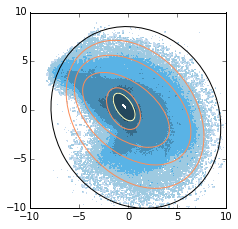

In [32]:
fig, axis = plt.subplots(1, figsize=(3.5, 3.5))
settings = utils.make_settings()
settings['parttype'] = ['stars', 'sfr']
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 

im = custom_plot(snap, axis, settings, plot_contours=True)